# Discrete Bayes Animations

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'..') # allow us to format the book
sys.path.insert(0,'../code') 
import book_format
book_format.load_style(directory='..')

This notebook creates the animations for the Discrete Bayesian filters chapter. It is not really intended to be a readable part of the book, but of course you are free to look at the source code, and even modify it. However, if you are interested in running your own animations, I'll point you to the examples subdirectory of the book, which contains a number of python scripts that you can run and modify from an IDE or the command line. This module saves the animations to GIF files, which is quite slow and not very interactive. 

In [2]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from book_plots import bar_plot
%matplotlib inline

# the predict algorithm of the discrete bayesian filter
def predict(pos, move, p_correct, p_under, p_over):
    n = len(pos)
    result = np.array(pos, dtype=float)
    for i in range(n):
                result[i] =  \
            pos[(i-move) % n]   * p_correct + \
            pos[(i-move-1) % n] * p_over + \
            pos[(i-move+1) % n] * p_under          
    return result


def normalize(p):
    s = sum(p)
    for i in range (len(p)):
        p[i] = p[i] / s
        
# the update algorithm of the discrete bayesian filter
def update(pos, measure, p_hit, p_miss):
    q = np.array(pos, dtype=float)
    for i in range(len(hallway)):
        if hallway[i] == measure:
            q[i] = pos[i] * p_hit
        else:
            q[i] = pos[i] * p_miss
    normalize(q)
    return q

In [3]:
import matplotlib
matplotlib.matplotlib_fname()
matplotlib.rcParams['animation.writer']

'imagemagick'

"anim = animation.FuncAnimation(fig, bar_animate,\n                               frames=100, interval=75)\nanim.save('02_no_info.gif', writer='imagemagick')"

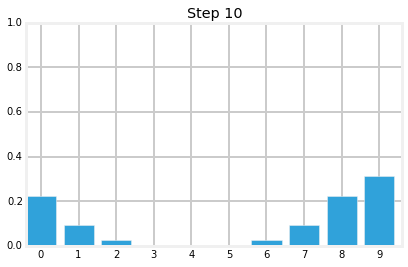

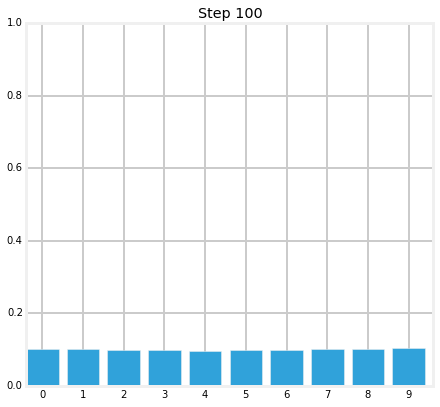

In [5]:
from gif_animate import animate

pos = [1.0,0,0,0,0,0,0,0,0,0]
def bar_animate(nframe):
    global pos
    bar_plot(pos)
    plt.title('Step {}'.format(nframe + 1))
    pos = predict(pos, 1, .8, .1, .1)

for i in range(10):
    bar_animate(i)

fig = plt.figure(figsize=(6.5, 2.5))
animate('foo.gif', bar_animate, frames=100, interval=75);
'''anim = animation.FuncAnimation(fig, bar_animate,
                               frames=100, interval=75)
anim.save('02_no_info.gif', writer='imagemagick')'''

<img src="02_no_info.gif">

In [ ]:
pos = np.array([.1]*10)
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

def bar_animate(nframe):
    global pos
    if nframe == 0:
        return

    bar_plot(pos, ylim=(0,1.0))
    if nframe % 2 == 0:
        pos = predict(pos, 1, .8, .1, .1)
    else:
        x = (nframe/2) % len(hallway)
        z = hallway[x]
        pos = update(pos, z, .6, .2)
        

fig = plt.figure(figsize=(6.5, 2.5))
anim = animation.FuncAnimation(fig, bar_animate,
                               frames=60, interval=75)
anim.save('02_simulate.gif', writer='imagemagick')

 <img src="02_simulate.gif">